In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def heatmap(df):
    corr = df.corr()
    s,ax = plt.subplots(figsize = (15,10))
    c_map = sns.diverging_palette(220,10, as_cmap = True)
    s = sns.heatmap(corr, cmap = c_map, square = True,
                    cbar_kws = {"shrink" : .9}, ax = ax,
                    annot = True, annot_kws = {"fontsize" : 7})

data = pd.read_csv("kc_house_data.csv")
print(data.isnull().sum())
data



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


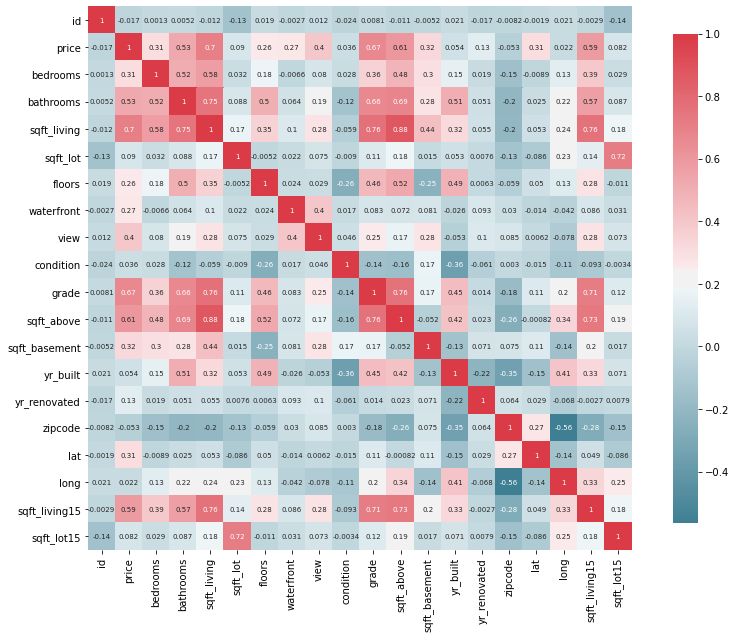

In [2]:
heatmap(data)

We can see in this Heatmap that the price of the house is significantly correlated with the value of : 
sqft_living, grade, sqft_above, sqft_living15,view and bathrooms variables


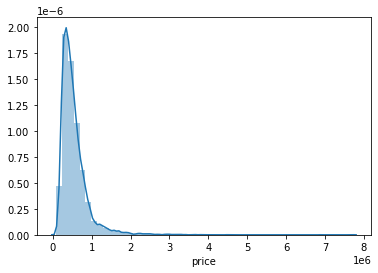

In [3]:
print("""We can see in this Heatmap that the price of the house is significantly correlated with the value of : 
sqft_living, grade, sqft_above, sqft_living15,view and bathrooms variables""")
figure = sns.distplot(data["price"])


In [4]:
data[["price","bathrooms","sqft_living", "grade", "sqft_above", "sqft_living15","view"]].groupby("price").mean()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15,view
price,,,,,,
75000.0,0.00,670.0,3.0,670.0,1160.0,0.0
78000.0,1.00,780.0,5.0,780.0,1700.0,0.0
80000.0,0.75,430.0,4.0,430.0,1200.0,0.0
81000.0,1.00,730.0,5.0,730.0,860.0,0.0
82000.0,1.00,860.0,6.0,860.0,1140.0,0.0
...,...,...,...,...,...,...
5350000.0,5.00,8000.0,12.0,6720.0,4600.0,4.0
5570000.0,5.75,9200.0,13.0,6200.0,3560.0,0.0
6885000.0,7.75,9890.0,13.0,8860.0,4540.0,4.0


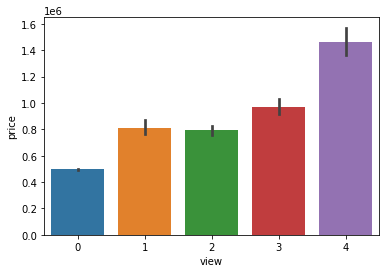

In [5]:
sns.barplot(x = data["view"], y = data["price"])

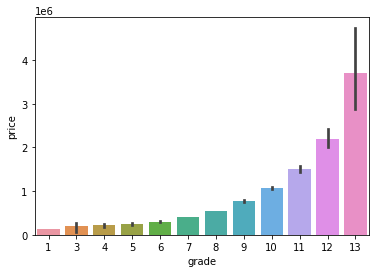

In [6]:
sns.barplot(x = data["grade"], y = data["price"])

Text(0, 0.5, 'price')

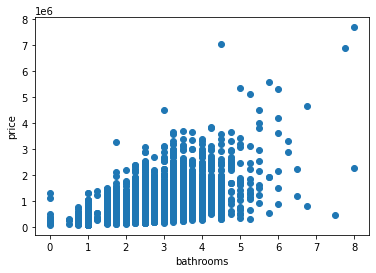

In [7]:
plt.scatter(x = data["bathrooms"], y = data["price"])
plt.xlabel("bathrooms")
plt.ylabel("price")

Text(0, 0.5, 'price')

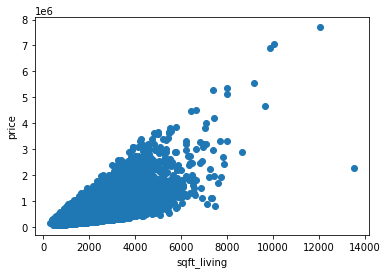

In [8]:
plt.scatter(x = data["sqft_living"], y = data["price"])
plt.xlabel("sqft_living")
plt.ylabel("price")

Text(0, 0.5, 'price')

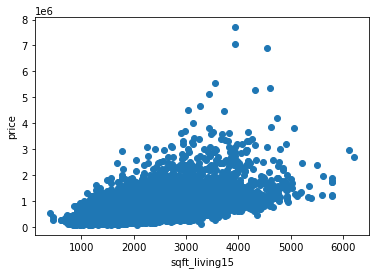

In [9]:
plt.scatter(x = data["sqft_living15"], y = data["price"])
plt.xlabel("sqft_living15")
plt.ylabel("price")

Text(0, 0.5, 'price')

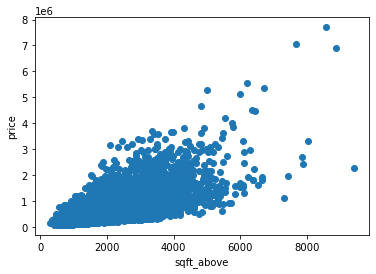

In [10]:
plt.scatter(x = data["sqft_above"], y = data["price"])
plt.xlabel("sqft_above")
plt.ylabel("price")

Feature Selection

We can see via those different plots and the HeatMap that the important features and the ones that have an impact on 
the price of the house are the following ones 
- <b> sqft_living </b> : A correlation of 0.7 with the price and we can see this correlation in its scatter plot 
- <b> grade </b> : A correlation of 0.67 with the price which  we can clearly see this correlation in its barplot
- <b> sqft_above </b> : A correlation of 0.61 with price which can be seen in its scatter plot  
- <b> sqft_living15 </b> : A correlation of 0.59 with the price which we can see in its scatter plot.
- <b> view </b> : A correlation of 0.4 with the price that we can see in its barplot
- <b> bathrooms </b> : A correlation of 0.53 with the price that we can also see in its scatter plot

Since the rest of the features have a non significant correlation with the price or are practically independent of it (This is practically 
the case when the value of the correlation is very close to 0) then we can ignore them.

MSE : 25471815608.713196
R-Squared :  0.30869183634938124


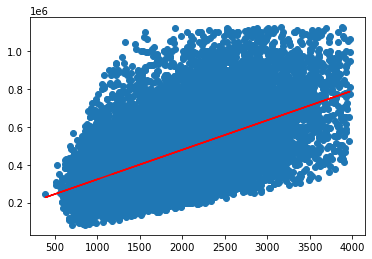

In [11]:
#Removing Outliers
for i in ["price","sqft_living","grade"]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    fil = (data[i] > Q1 - 1.5 * IQR) & (data[i] < Q3 + 1.5 * IQR)
    data = data.loc[fil]

def Regression(x,y,z,e,f):
    liste_mse = []
    liste_xy = []

    #Regression (If e is True then we apply a Polynomial Regression of degree f and in the other case in which e is False we apply 
    # a Multi Linear or a Linear Regression (Depending on the x and y parameters)) and if z is True then we plot the Regression
    # in a scatter plot.

    for i in range(0,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3)
        lg = LinearRegression()
        polyno = PolynomialFeatures(degree = f)
        if(e == True):
            x_train = polyno.fit_transform(x_train)
            x_test = polyno.fit_transform(x_test)
        lg.fit(x_train,y_train)
        predict_lg = lg.predict(x_test)
        liste_mse.append(mean_squared_error(y_test,predict_lg))
        liste_xy.append([x_train,x_test,y_train,y_test])

    #Choosing the best prediction (Through finding the minimum value of the Mean-Squared Error)
    
    g = 0
    indx = 0
    for n in liste_mse:
        if(g == 0):
            d = n
        else:
            if(n < d):
                d = n
                indx = g
        g += 1
    x_train,x_test,y_train,y_test = liste_xy[indx]
    lng = LinearRegression()
    lng.fit(x_train,y_train)
    if(z == True):
        plt.scatter(x,y)
        plt.plot(x,lng.predict(x),color="r")
    print("MSE :",  mean_squared_error(y_test,lng.predict(x_test)))
    print("R-Squared : ", metrics.r2_score(y_test,lng.predict(x_test))) 
        

x = data["sqft_living"].values[:,np.newaxis]
y = data["price"].values

Regression(x,y,True,False,0)

<font color="red" size = "3"> Interpretation </font>

Since the <b>R-Squared</b> has a value of approximately 0.3 hence we can say that the model explains 30% of the variations between the price and the sqft_living and since the value of <b> the Mean Squared Error </b> is approximately 25 471 815 608 then it means that the error of prediction is at average  25 471 815 608 approximately.

In [12]:
x = data[["sqft_living","grade"]]
Regression(x,y,False,False,0)

MSE : 23071638506.86585
R-Squared :  0.37405714230489995


<font color = "red" size = "3"> Comparison and Interpretation </font>

We can see that if apply an Multi Linear Regression with the sqft_living and grade features then we can see that compared to 
the performance of the Linear Regression :
- the <b> R-Squared </b> is higher which means that this model explains the data variation more than the other model 
- the <b> Mean Squared Error </b> is less which means that the average squared difference between the model's predictions and the actual data is less.

Hence we can say that this model based on Multi Linear Regression has done better performances then the model based on Linear Regression and this informs us that the price is impacted by more than only one feature and that one feature is not sufficient to predict the price.

In [13]:
#Code for Polynomial Regression 

# poly = PolynomialFeatures(degree = 2)
# ling = LinearRegression()
# x = data["sqft_living"].values.reshape(-1,1)

# x_training,x_testing,y_training,y_testing = train_test_split(x,y,train_size = 0.4)

# x_training_fit = poly.fit_transform(x_training)
# x_testing_fit = poly.fit_transform(x_testing)

# ling.fit(x_training_fit,y_training)
# model_poly = ling.predict(x_testing_fit)

# print("MSE : ", mean_squared_error(y_testing,ling.predict(x_testing_fit)))
# print("R-Squared : ", metrics.r2_score(y_testing,ling.predict(x_testing_fit)))
# plt.scatter(x,y)
# plt.plot(x,ling.predict(poly.fit_transform(x)),color="r")

#Polynomial Regression using Regression function

Regression(x,y,False,True,6)


MSE : 22858400989.56139
R-Squared :  0.37737672239211073


 Comparison and Interpretation 

We can see here that compared to the Multi Linear Regression model and the Linear Regression Model, this model based on Polynomial Regression has done a performance in which :

- the value of <b> Mean Squared Error </b> is less compared to the values of the Mean Squared Error of the other models and this means that the average of the squared difference between the predictions and the actual values is less and hence the predictions are more close to the actual values compared to other models 
- the value of the <b> R-Squared </b> is higher compared to the values of the R-Squared of the other models and this means that this model based on Polynomial Regression explains more of the data compared to the other models

Therefore we can say that this model based on Polynomial Regression has done some better performances compared to the models based on Multi Linear Regression and on Linear Regression and this also means that our data can be more accurately represented  by curves compared to lines. 